# 1. File Preperation 

In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [3]:
# Define the font properties
#font = {'family': 'sans-serif',
       # 'size': 14}

# Apply the font settings globally for Matplotlib
#plt.rc('font', **font)

# Apply the font settings globally for Seaborn
#sns.set_context("notebook", rc={"font.family": font['family'], "font.size": font['size']})


In [4]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [5]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv')

In [6]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [7]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [8]:
# Convert Sentiment_Classification to Numerical
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the sentiment column to numerical values
data_helpful['SentimentC'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
data['SentimentC'] = data['Sentiment_Classification'].map(sentiment_mapping)

data_utilitarian['SentimentC'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic['SentimentC'] = data_hedonic['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic_raw['SentimentC'] = data_hedonic_raw['Sentiment_Classification'].map(sentiment_mapping)
data_utilitarian_raw['SentimentC'] = data_utilitarian_raw['Sentiment_Classification'].map(sentiment_mapping)

In [9]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['Rating','RewExt','Sentiment','Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
            'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [10]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'helpful_ratio': ['mean'],  # Calculate the mean of the 'helpful_ratio' column
        'Rating': ['mean'],
        'RewExt': ['mean'],
        'Sentiment': ['mean'],
        'Subjective': ['mean'],
        'ElapDays': ['mean'],
        'WordC': ['mean'],
        'SentC': ['mean'],
        'SentL': ['mean'],
        'TitleL': ['mean'],
        'FRE': ['mean'],
        'AdjR': ['mean'],
        'AdvR': ['mean'],
        'NounR': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

In [11]:
print (data_helpful.columns)
print (data.columns)

Index(['title_x', 'text', 'text_cleaned', 'text_cleaned1', 'images', 'Image',
       'helpful_vote', 'total_helpful_votes', 'helpful_ratio', 'RewExt',
       'Rating', 'asin', 'parent_asin', 'main_category', 'prod_title',
       'average_rating', 'features', 'price', 'RatingC', 'Prod', 'prod_type',
       'user_id', 'VerPur', 'verified_purchase', 'timestamp', 'year',
       'is_weekend', 'ElapDays', 'WordC', 'SentC', 'SentL', 'TitleL',
       'noun_count', 'adj_count', 'adv_count', 'NounR', 'AdjR', 'AdvR', 'FRE',
       'Sentiment', 'Sentiment_Classification', 'Subjective', 'SentimentC'],
      dtype='object')
Index(['title_x', 'text', 'text_cleaned', 'text_cleaned1', 'images', 'Image',
       'helpful_vote', 'total_helpful_votes', 'helpful_ratio', 'RewExt',
       'Rating', 'asin', 'parent_asin', 'main_category', 'prod_title',
       'average_rating', 'features', 'price', 'RatingC', 'Prod', 'prod_type',
       'user_id', 'VerPur', 'verified_purchase', 'timestamp', 'year',
       'is_w

In [12]:
import pandas as pd

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ["helpful_ratio",'Rating',"RatingC",'RewExt','Sentiment','Subjective','WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                         'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']
    
    # Ensure the columns exist in the DataFrame
    numerical_columns = [col for col in numerical_columns if col in df.columns]

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean',  'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transpose the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

# Assuming 'data_helpful' DataFrame is already loaded
summary_stats_prodType = summary_statistic(data_helpful, 'Prod')

# Display the DataFrame
print(summary_stats_prodType)

# Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')


Prod                      Battery  Facial Spray        Filter  Gaming Mouse  \
helpful_ratio_mean       0.000706      0.000695      0.001443      0.001950   
helpful_ratio_std        0.009424      0.004858      0.010900      0.019651   
Rating_mean              2.827893      4.172161      2.479076      2.589641   
Rating_std               1.736063      1.426226      1.742426      1.678481   
RatingC_mean        180458.000000  60672.000000  90203.000000  46976.000000   
RatingC_std              0.000000      0.000000      0.000000      0.000000   
RewExt_mean             -1.772107     -0.327839     -2.220924     -2.110359   
RewExt_std               1.736063      1.426226      1.742426      1.678481   
Sentiment_mean           2.807122      4.224908      2.542569      2.639442   
Sentiment_std            1.837289      1.418859      1.798359      1.703430   
Subjective_mean          0.758948      0.831447      0.782372      0.799156   
Subjective_std           0.212260      0.191338     

### Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [13]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.001272     0.001149
Rating_mean            2.776357     3.905267
RewExt_mean           -1.841203    -0.683526
Sentiment_mean         2.806084     3.968850
Subjective_mean        0.778154     0.827017
ElapDays_mean       1086.690633  1647.171162
WordC_mean            62.014518    49.102441
SentC_mean             4.120982     3.659923
SentL_mean            16.782067    15.200412
TitleL_mean            1.219150     1.330122
FRE_mean              79.081822    83.444875
AdjR_mean              0.093287     0.098832
AdvR_mean              0.079705     0.070140
NounR_mean             0.189953     0.182553


In [14]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.001443     0.000799     0.001119    0.001438   
Rating_mean            2.479076     4.087429     2.748843    3.136827   
RewExt_mean           -2.220924    -0.453197    -1.884336   -1.363173   
Sentiment_mean         2.542569     4.129187     2.751487    3.192140   
Subjective_mean        0.782372     0.827078     0.772289    0.786815   
ElapDays_mean       1258.825397  1917.042627  1370.372108  288.292576   
WordC_mean            65.810967    47.799478    72.373430   35.371179   
SentC_mean             4.587302     3.608090     4.434237    2.960699   
SentL_mean            16.693987    15.183663    17.957943   14.281251   
TitleL_mean            1.268398     1.244019     1.186385    1.241630   
FRE_mean              76.839307    83.628621    77.783483   84.203290   
AdjR_mean              0.077660     0.101053     0.088746    0.119053   
AdvR_mean              0.071303     0.072050     0.

In [15]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000695    0.002421     0.000950     0.001870
Rating_mean             4.172161    2.842640     3.963597     3.904988
RewExt_mean            -0.327839   -1.801523    -0.636403    -0.895012
Sentiment_mean          4.224908    3.139594     3.989293     3.869359
Subjective_mean         0.831447    0.842264     0.820693     0.812414
ElapDays_mean        1931.427839  759.644670  1896.019272  1004.061758
WordC_mean             47.175824   52.571066    48.710921    52.971496
SentC_mean              3.559707    4.215736     3.678801     3.422803
SentL_mean             14.683745   14.339330    15.914271    16.097732
TitleL_mean             1.243223    1.697970     1.245182     1.456057
FRE_mean               83.042938   83.136447    84.484572    82.730119
AdjR_mean               0.099095    0.102835     0.103914     0.082959
AdvR_mean               0.071667    0.066688     0.072610     0.062938
NounR_

In [16]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'Prod')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000706     0.001443      0.001950      0.001438
Rating_mean            2.827893     2.479076      2.589641      3.136827
RewExt_mean           -1.772107    -2.220924     -2.110359     -1.363173
Sentiment_mean         2.807122     2.542569      2.639442      3.192140
Subjective_mean        0.758948     0.782372      0.799156      0.786815
ElapDays_mean       1589.308605  1258.825397    929.446215    288.292576
WordC_mean            53.816024    65.810967    109.747012     35.371179
SentC_mean             3.746785     4.587302      5.818725      2.960699
SentL_mean            16.167253    16.693987     21.564294     14.281251
TitleL_mean            1.232443     1.268398      1.093625      1.241630
FRE_mean              78.956419    76.839307     75.421255     84.203290
AdjR_mean              0.087552     0.077660      0.091149      0.119053
AdvR_mean              0.086439     0.071303      0

### Analyzing Mean of Review Data

In [17]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.000193     0.000128     0.000151    0.000553   
Rating_mean            3.983410     4.355089     3.877414    3.749720   
RewExt_mean           -0.716590    -0.200921    -0.758289   -0.750280   
Sentiment_mean         3.895255     4.384266     3.836016    3.715006   
Subjective_mean        0.785126     0.804405     0.780077    0.771776   
ElapDays_mean       1178.367670  1745.169482  1415.493205  300.811310   
WordC_mean            27.031829    25.934734    39.761534   24.443449   
SentC_mean             2.414545     2.399693     2.860336    2.328108   
SentL_mean            11.506868    11.759541    14.370805   11.813492   
TitleL_mean            1.387153     1.489739     1.288001    1.370661   
FRE_mean              79.072822    87.034743    80.785375   85.177643   
AdjR_mean              0.125423     0.125479     0.112582    0.136350   
AdvR_mean              0.071910     0.072438     0.

In [18]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.000203     0.000194
Rating_mean            3.895120     4.330949
RewExt_mean           -0.745593    -0.265182
Sentiment_mean         3.841027     4.351430
Subjective_mean        0.780702     0.805594
ElapDays_mean       1238.117385  1554.529530
WordC_mean            34.619478    26.569788
SentC_mean             2.680676     2.420405
SentL_mean            13.301398    11.817728
TitleL_mean            1.324446     1.523244
FRE_mean              80.728457    86.960329
AdjR_mean              0.118587     0.119563
AdvR_mean              0.082609     0.069872
NounR_mean             0.196081     0.190823


In [19]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000695    0.002421     0.000950     0.001870
Rating_mean             4.172161    2.842640     3.963597     3.904988
RewExt_mean            -0.327839   -1.801523    -0.636403    -0.895012
Sentiment_mean          4.224908    3.139594     3.989293     3.869359
Subjective_mean         0.831447    0.842264     0.820693     0.812414
ElapDays_mean        1931.427839  759.644670  1896.019272  1004.061758
WordC_mean             47.175824   52.571066    48.710921    52.971496
SentC_mean              3.559707    4.215736     3.678801     3.422803
SentL_mean             14.683745   14.339330    15.914271    16.097732
TitleL_mean             1.243223    1.697970     1.245182     1.456057
FRE_mean               83.042938   83.136447    84.484572    82.730119
AdjR_mean               0.099095    0.102835     0.103914     0.082959
AdvR_mean               0.071667    0.066688     0.072610     0.062938
NounR_

In [20]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'Prod')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000706     0.001443      0.001950      0.001438
Rating_mean            2.827893     2.479076      2.589641      3.136827
RewExt_mean           -1.772107    -2.220924     -2.110359     -1.363173
Sentiment_mean         2.807122     2.542569      2.639442      3.192140
Subjective_mean        0.758948     0.782372      0.799156      0.786815
ElapDays_mean       1589.308605  1258.825397    929.446215    288.292576
WordC_mean            53.816024    65.810967    109.747012     35.371179
SentC_mean             3.746785     4.587302      5.818725      2.960699
SentL_mean            16.167253    16.693987     21.564294     14.281251
TitleL_mean            1.232443     1.268398      1.093625      1.241630
FRE_mean              78.956419    76.839307     75.421255     84.203290
AdjR_mean              0.087552     0.077660      0.091149      0.119053
AdvR_mean              0.086439     0.071303      0

### Total Analysis (mean, median, variance)

In [21]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic, 'Prod')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


Prod                Facial Spray         Music       Perfume   Video Games
helpful_ratio_mean      0.000695      0.002421      0.000950      0.001870
helpful_ratio_std       0.004858      0.006645      0.005756      0.007347
Rating_mean             4.172161      2.842640      3.963597      3.904988
Rating_std              1.426226      1.786466      1.540717      1.605200
RatingC_mean        60672.000000  36762.799492  97548.000000  45702.444181
RatingC_std             0.000000   4277.302641      0.000000   4187.874429
RewExt_mean            -0.327839     -1.801523     -0.636403     -0.895012
RewExt_std              1.426226      1.749939      1.540717      1.605200
Sentiment_mean          4.224908      3.139594      3.989293      3.869359
Sentiment_std           1.418859      1.711600      1.536234      1.634316
Subjective_mean         0.831447      0.842264      0.820693      0.812414
Subjective_std          0.191338      0.180541      0.187058      0.216853
WordC_mean             47

In [22]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian, 'Prod')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

Prod                      Battery        Filter  Gaming Mouse   Toilet Paper
helpful_ratio_mean       0.000706      0.001443      0.001950       0.001438
helpful_ratio_std        0.009424      0.010900      0.019651       0.002617
Rating_mean              2.827893      2.479076      2.589641       3.136827
Rating_std               1.736063      1.742426      1.678481       1.697682
RatingC_mean        180458.000000  90203.000000  46976.000000  125736.000000
RatingC_std              0.000000      0.000000      0.000000       0.000000
RewExt_mean             -1.772107     -2.220924     -2.110359      -1.363173
RewExt_std               1.736063      1.742426      1.678481       1.697682
Sentiment_mean           2.807122      2.542569      2.639442       3.192140
Sentiment_std            1.837289      1.798359      1.703430       1.749068
Subjective_mean          0.758948      0.782372      0.799156       0.786815
Subjective_std           0.212260      0.169700      0.179488       0.184201

In [23]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                       0             1
helpful_ratio_mean       0.001272      0.001149
helpful_ratio_std        0.011321      0.005788
Rating_mean              2.776357      3.905267
Rating_std               1.734874      1.590109
RatingC_mean        122681.058071  66683.488760
RatingC_std          49160.976010  21890.150990
RewExt_mean             -1.841203     -0.683526
RewExt_std               1.747524      1.599173
Sentiment_mean           2.806084      3.968850
Sentiment_std            1.799436      1.561048
Subjective_mean          0.778154      0.827017
Subjective_std           0.191004      0.192527
WordC_mean              62.014518     49.102441
WordC_std               70.620661     49.790736
SentC_mean               4.120982      3.659923
SentC_std                3.590639      2.840489
SentL_mean              16.782067     15.200412
SentL_std               10.802005     10.059357
TitleL_mean              1.219150      1.330122
TitleL_std               1.226869      1

# 3. Correlation Analysis


In [24]:
features =  ['helpful_ratio','Rating','RewExt','Sentiment','Subjective', 'ElapDays',
            'Image', 'VerPur','WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

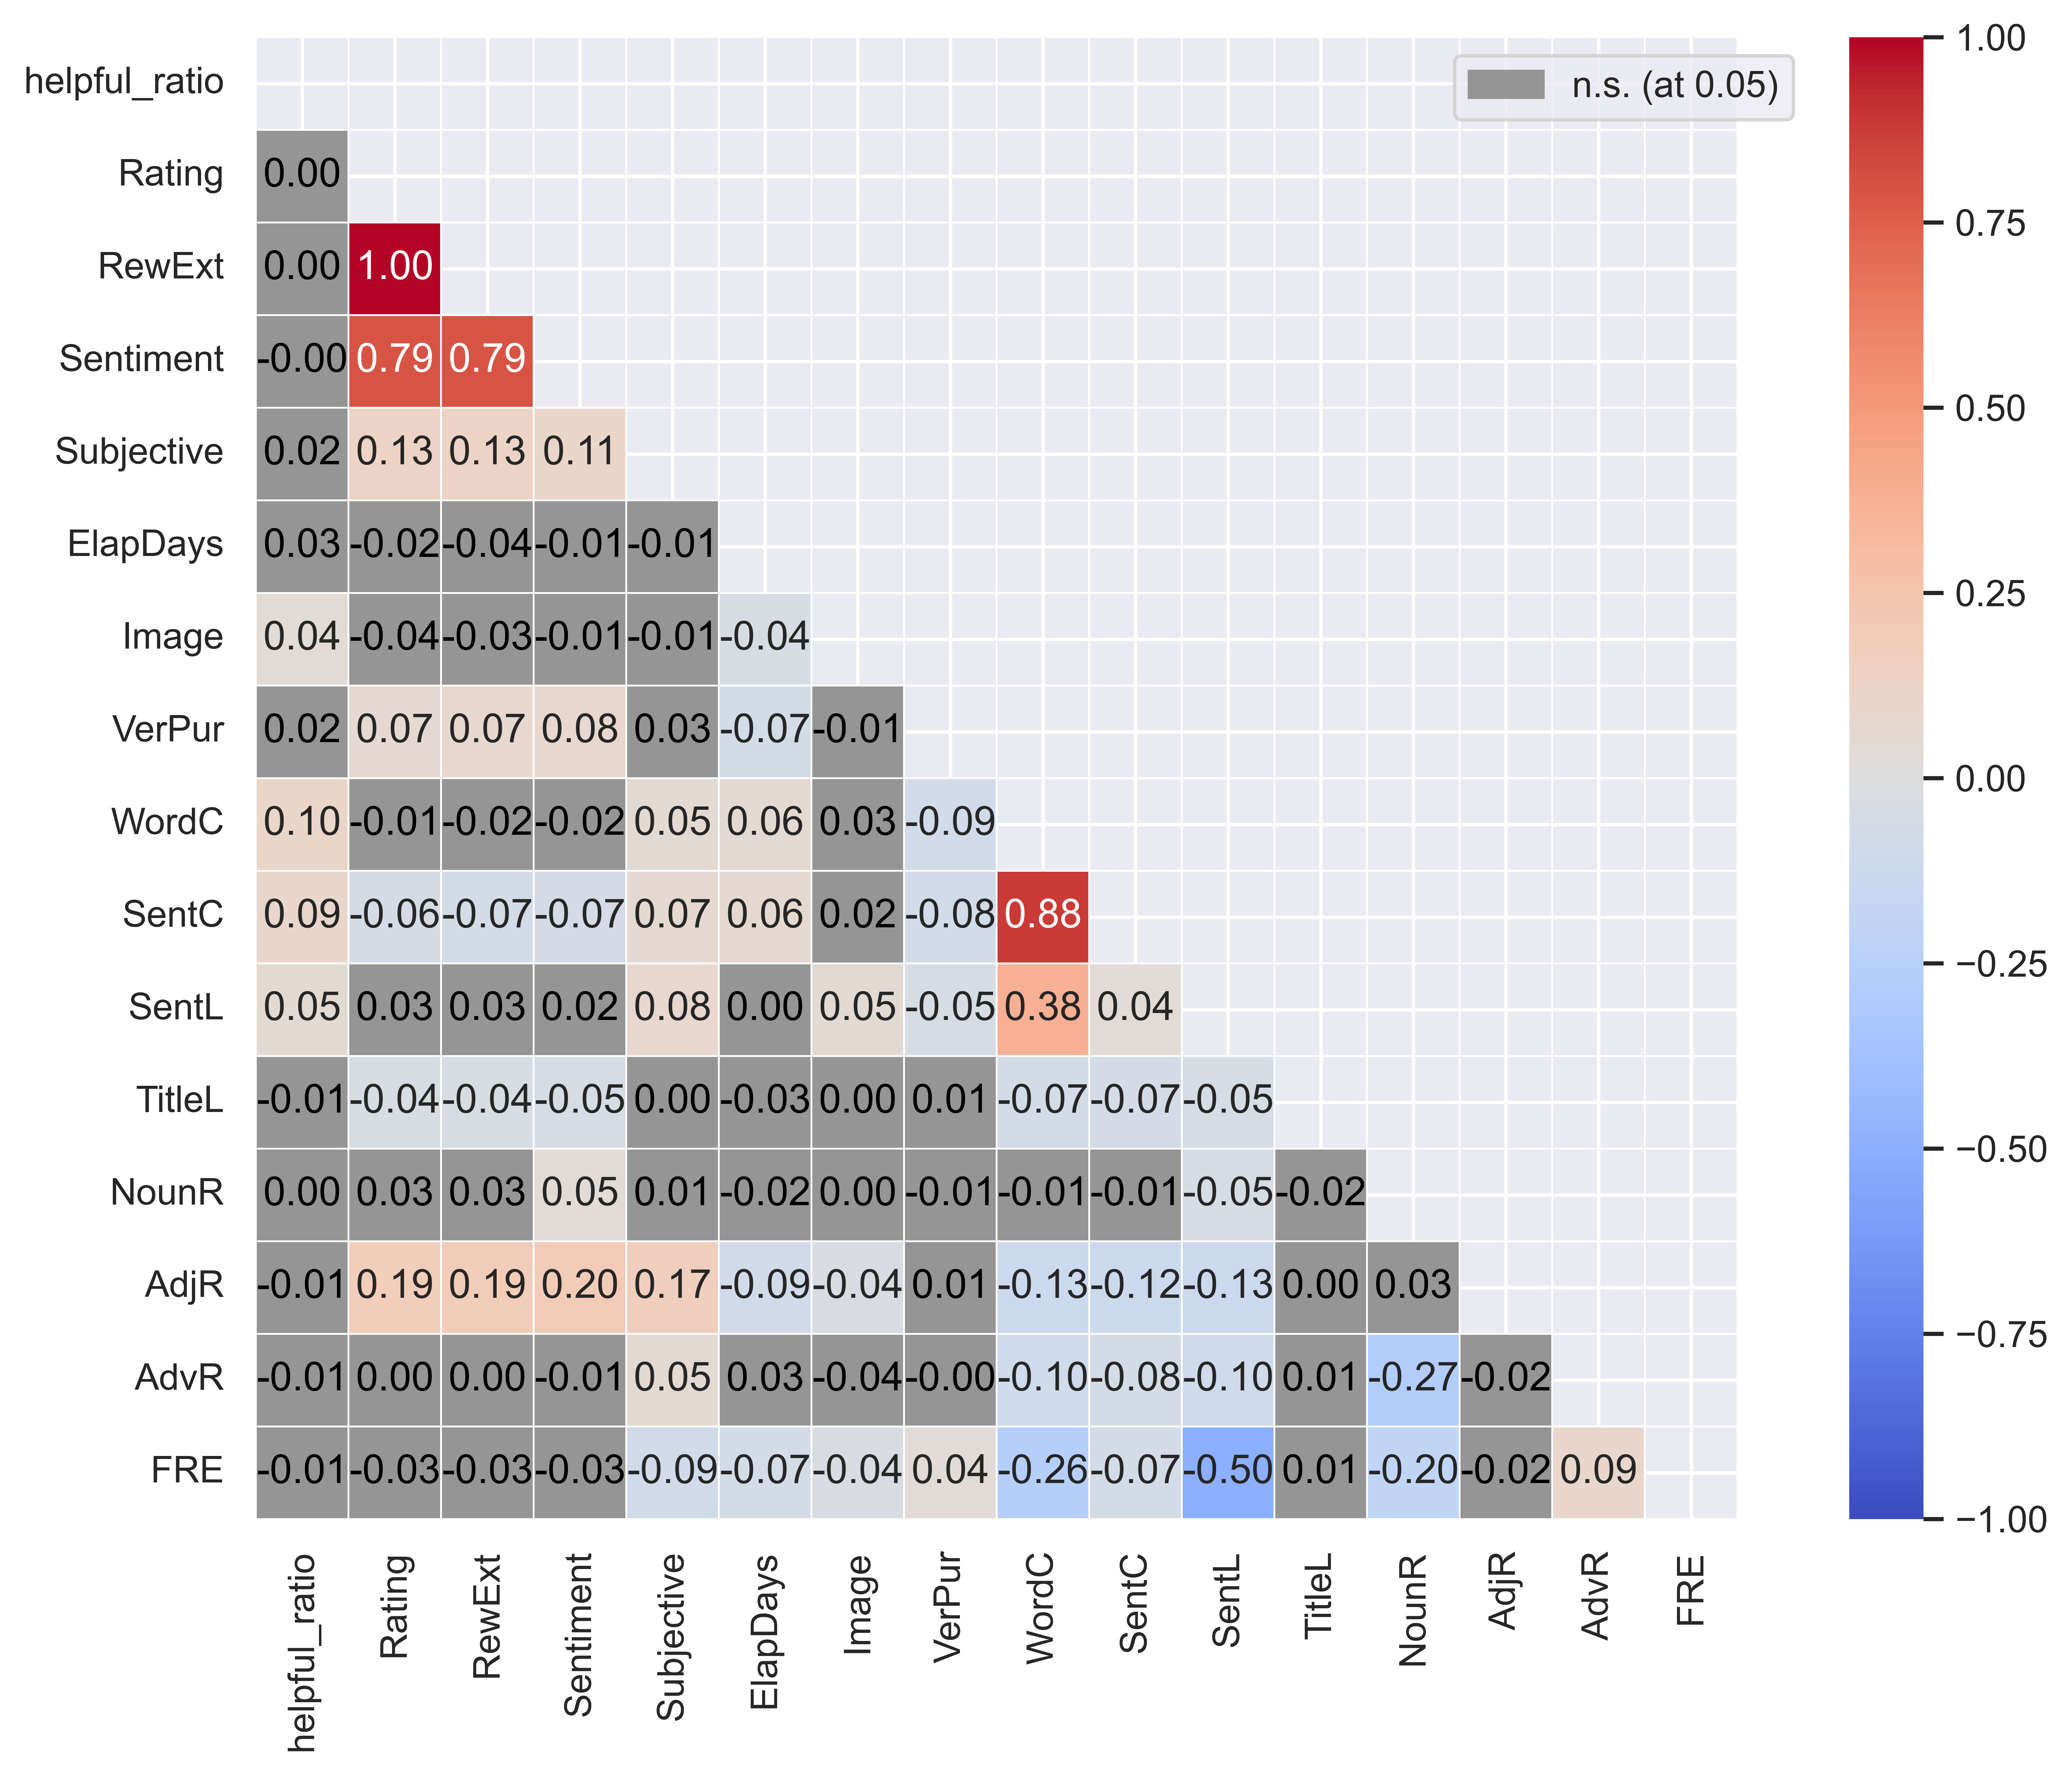

In [25]:

# Calculate correlation matrix for utilitarian data
corr_matrix_uti = data_utilitarian[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_uti.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_utilitarian[features[i]], data_utilitarian[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_uti, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_uti, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_uti, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)

plt.show()

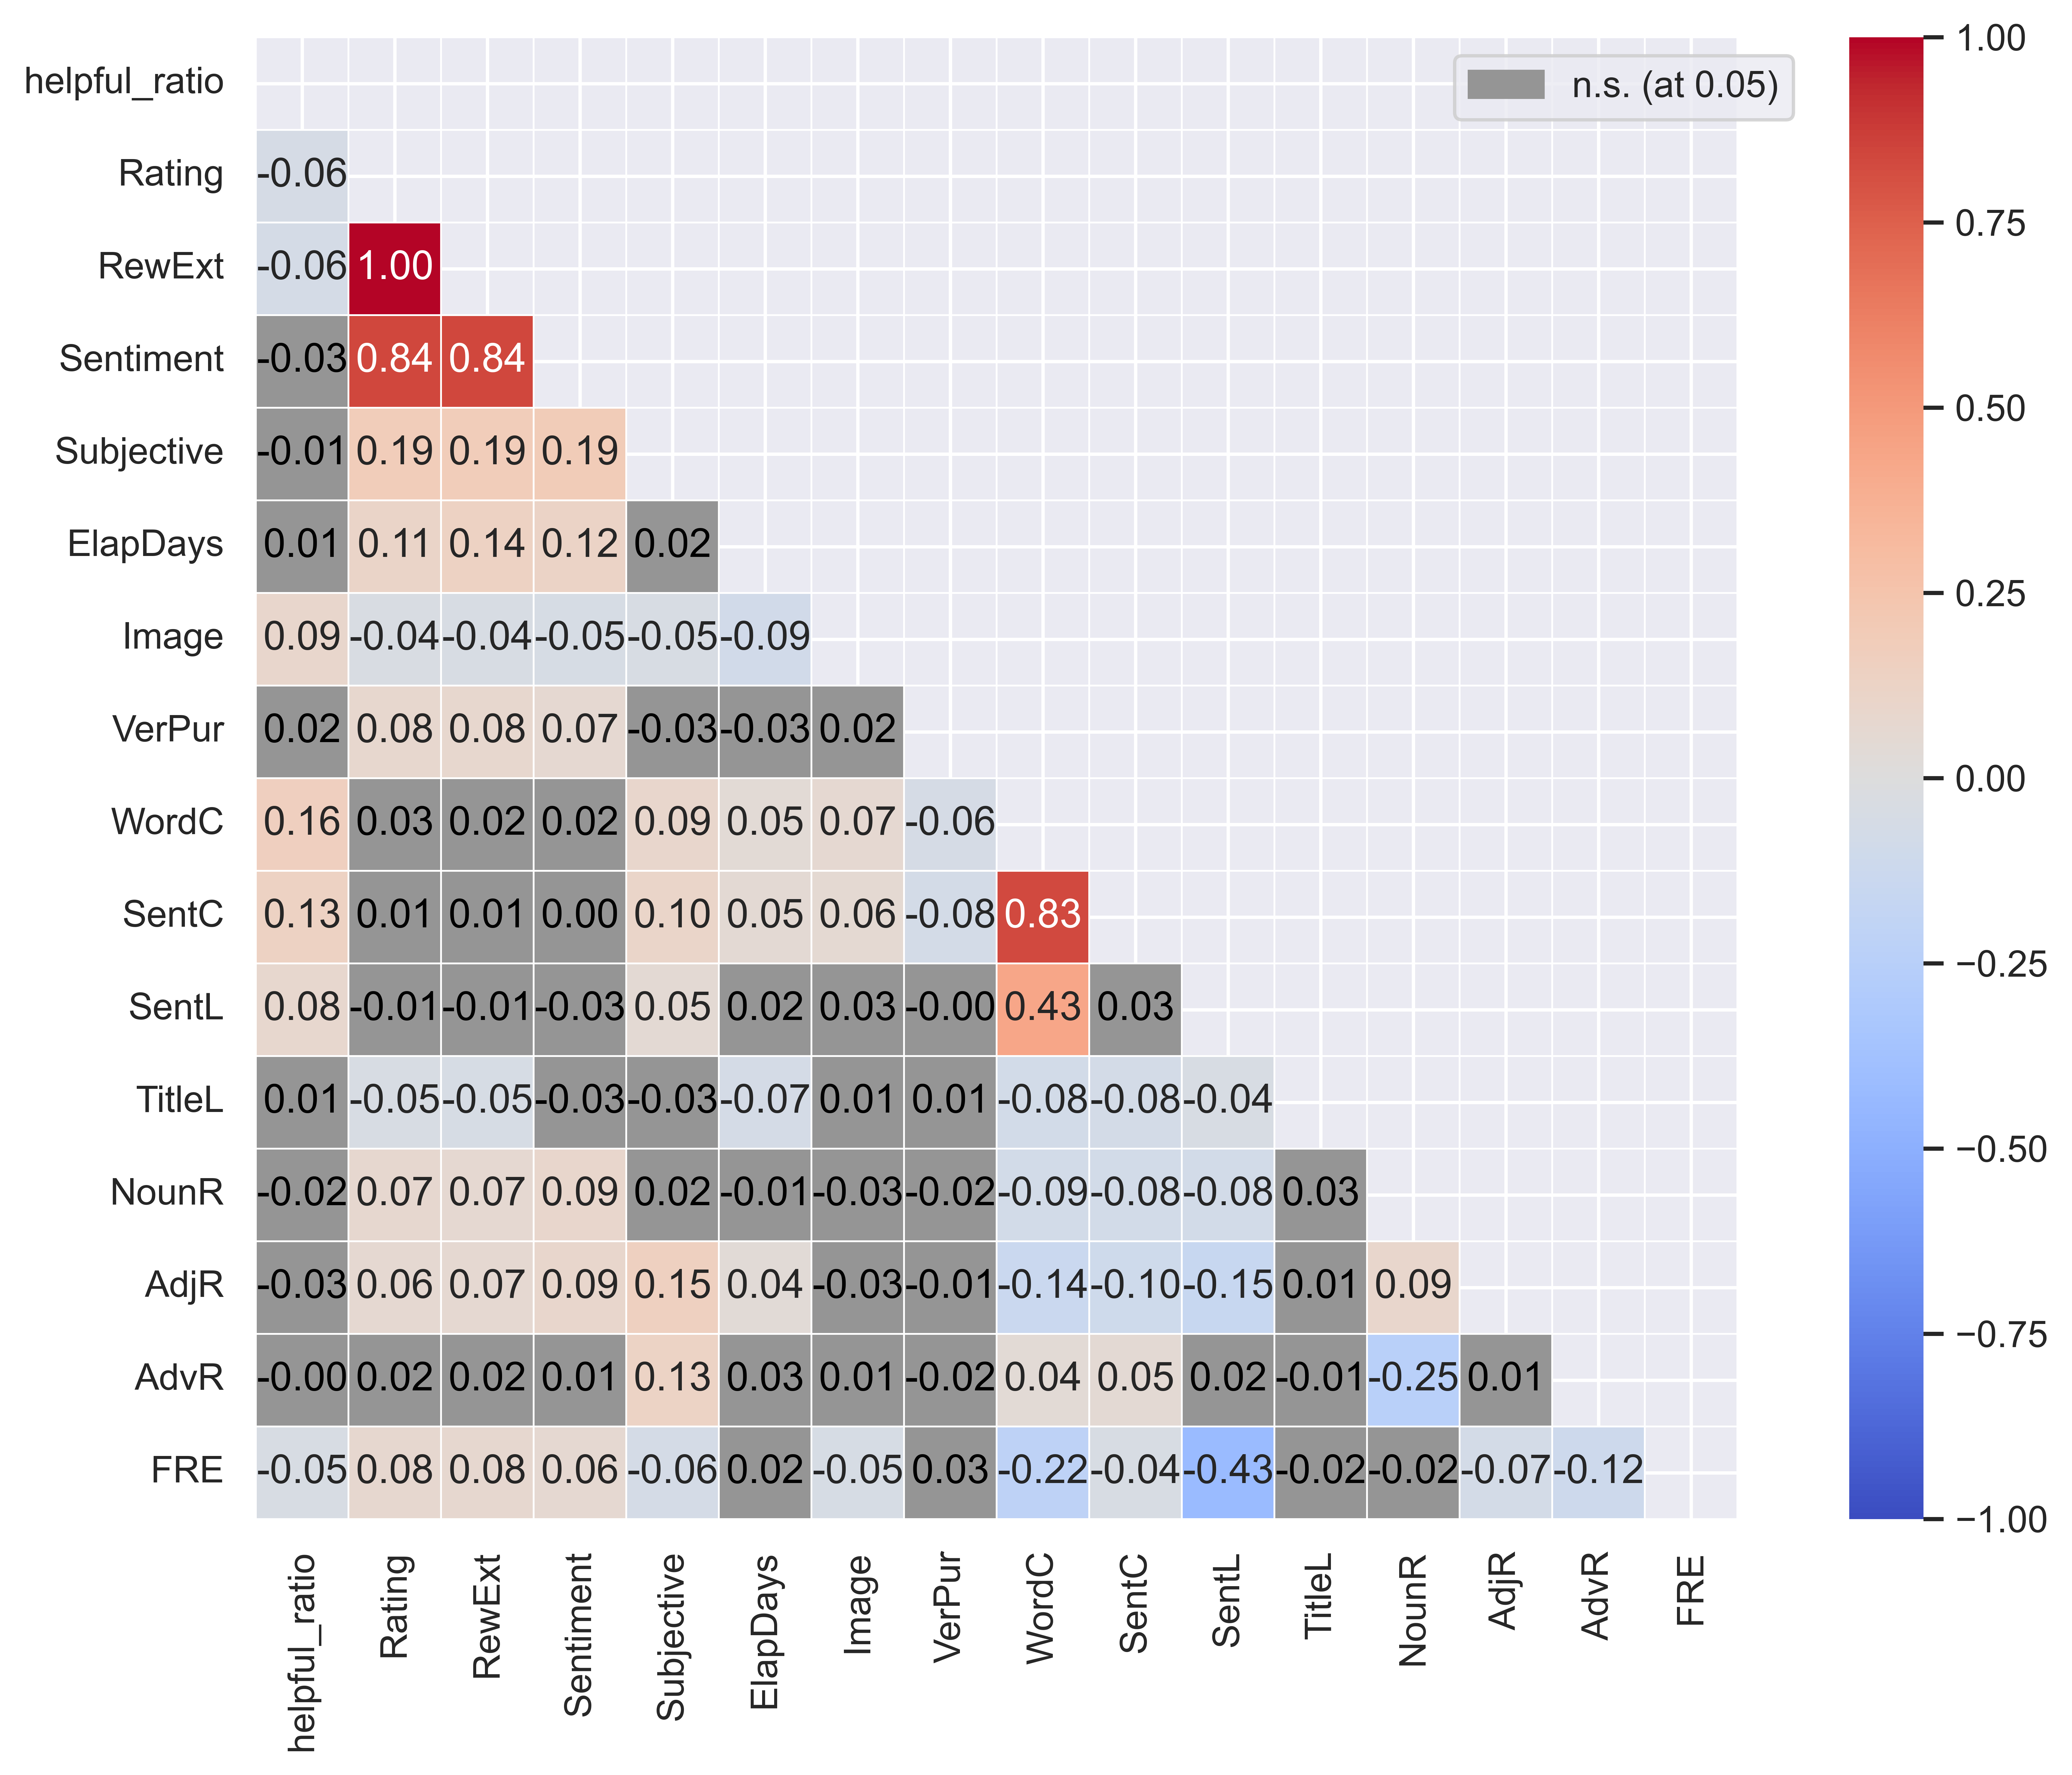

In [26]:
# Calculate correlation matrix
corr_matrix_hed = data_hedonic[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_hed.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_hedonic[features[i]], data_hedonic[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_hed, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_hed, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_hed, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)


plt.show()


In [27]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data_utilitarian['FRE'], data_utilitarian['Rating'])

print("Correlation coefficient between sentiment and rating:", correlation)
print("P-value:", p_value)


Correlation coefficient between sentiment and rating: -0.03445892175933883
P-value: 0.06385683275429505


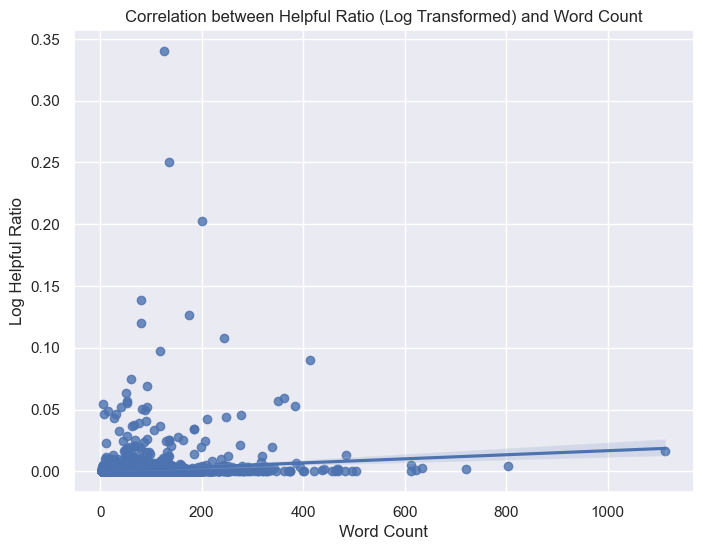

Correlation Coefficient: 0.1255239047492995


In [28]:
# Apply log transformation to 'Helpful_ratio'
data_helpful['log_Helpful_ratio'] = np.log(data_helpful['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_helpful)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_helpful['WordC'].corr(data_helpful['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)



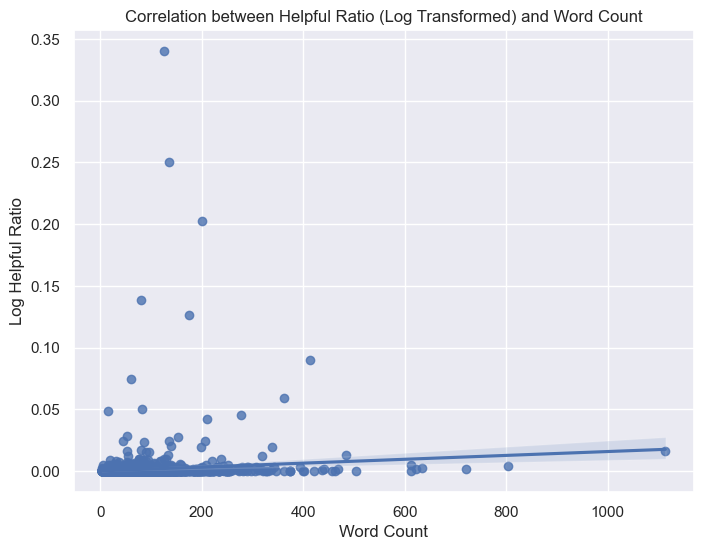

Correlation Coefficient: 0.1109025125749638


In [29]:
# Apply log transformation to 'Helpful_ratio'
data_utilitarian['log_Helpful_ratio'] = np.log(data_utilitarian['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_utilitarian)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_utilitarian['WordC'].corr(data_utilitarian['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


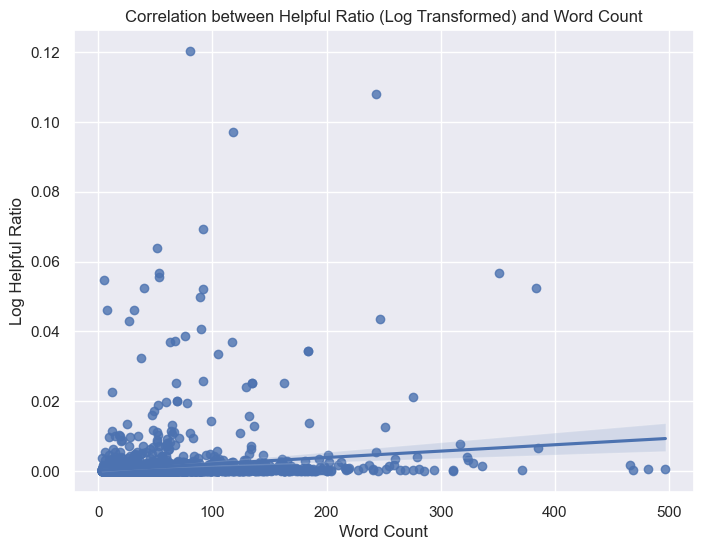

Correlation Coefficient: 0.16272279305895518


In [30]:
# Apply log transformation to 'Helpful_ratio'
data_hedonic['log_Helpful_ratio'] = np.log(data_hedonic['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_hedonic)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_hedonic['WordC'].corr(data_hedonic['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


# 4. Graphs and Plots for Data analysis 

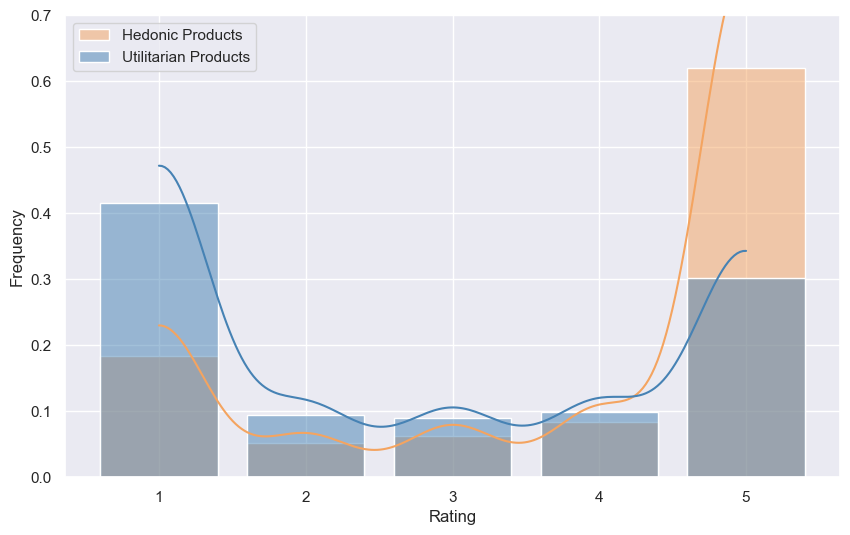

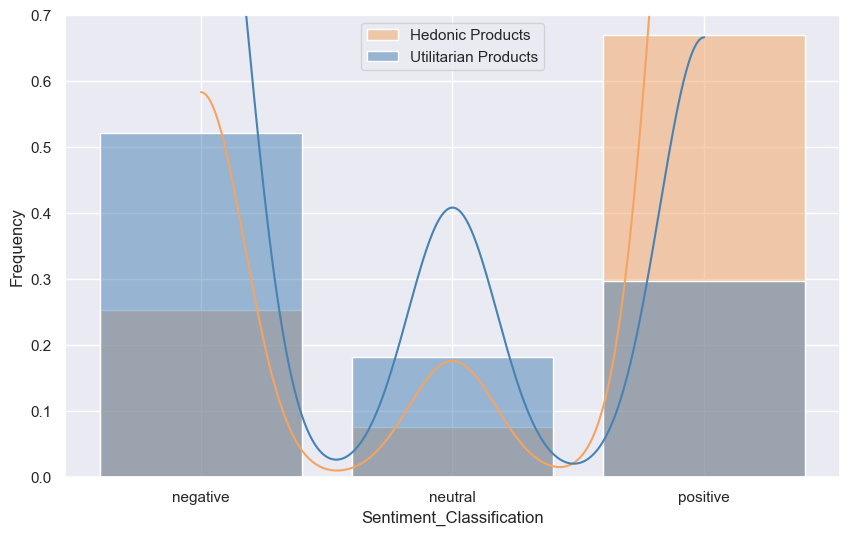

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

data_hedonic['Rating'] = pd.Categorical(data_hedonic['Rating'])
data_hedonic['Sentiment_Classification'] = pd.Categorical(data_hedonic['Sentiment_Classification'])

data_utilitarian['Sentiment_Classification'] = pd.Categorical(data_utilitarian['Sentiment_Classification'])
data_utilitarian['Rating'] = pd.Categorical(data_utilitarian['Rating'])

# Define the features of interest
features =  ['Rating','Sentiment_Classification']

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='sandybrown', kde=True, label='Hedonic Products',stat='probability', bins=5,shrink=0.8)
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='steelblue', kde=True, label='Utilitarian Products',stat='probability',bins=5,shrink=0.8)
    
    # Set y-axis limit to 1
    plt.ylim(0, 0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

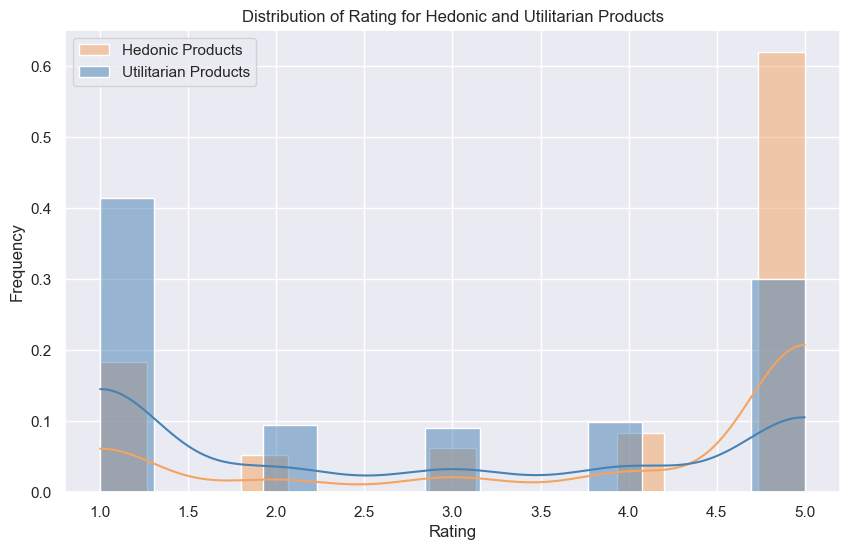

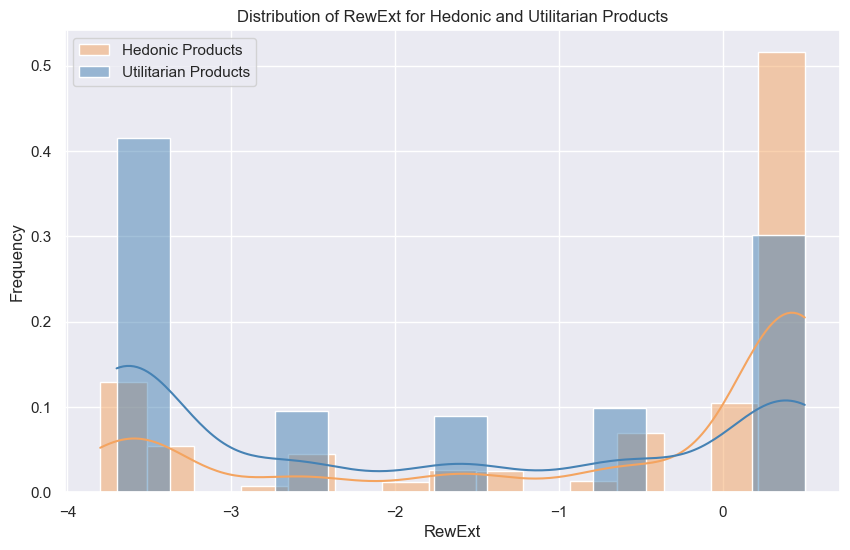

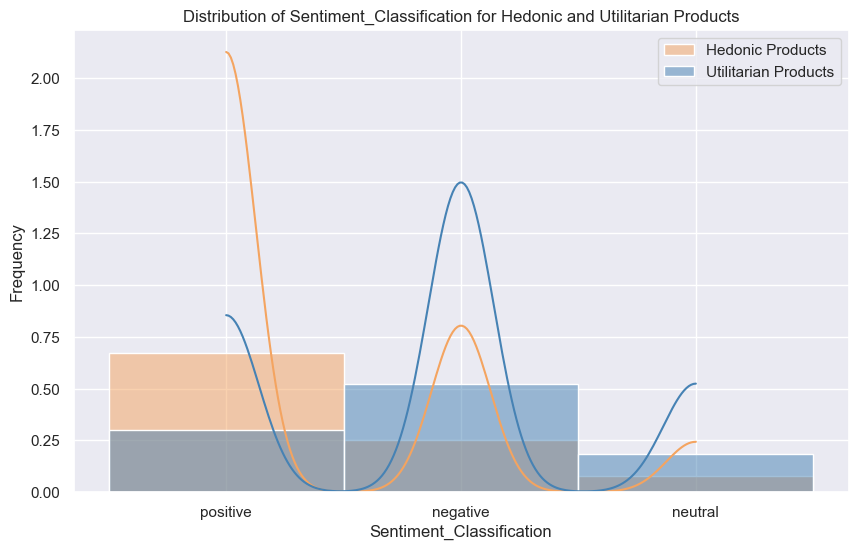

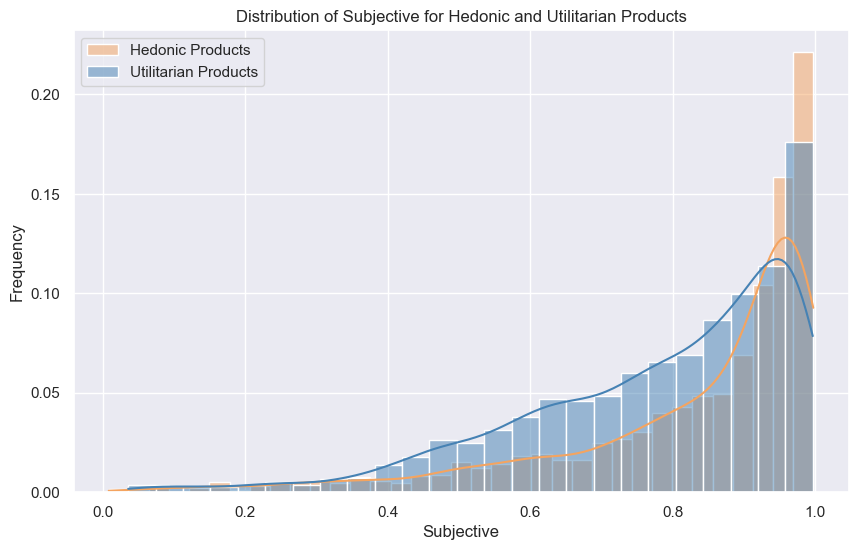

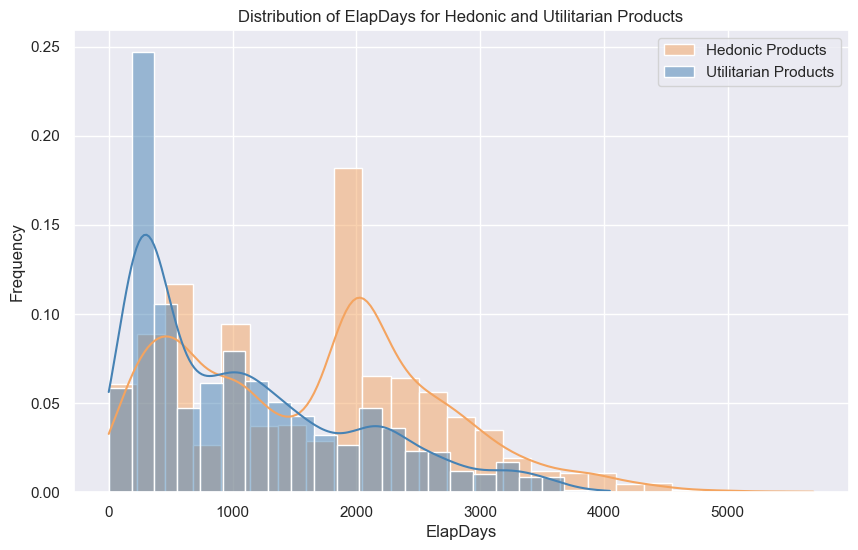

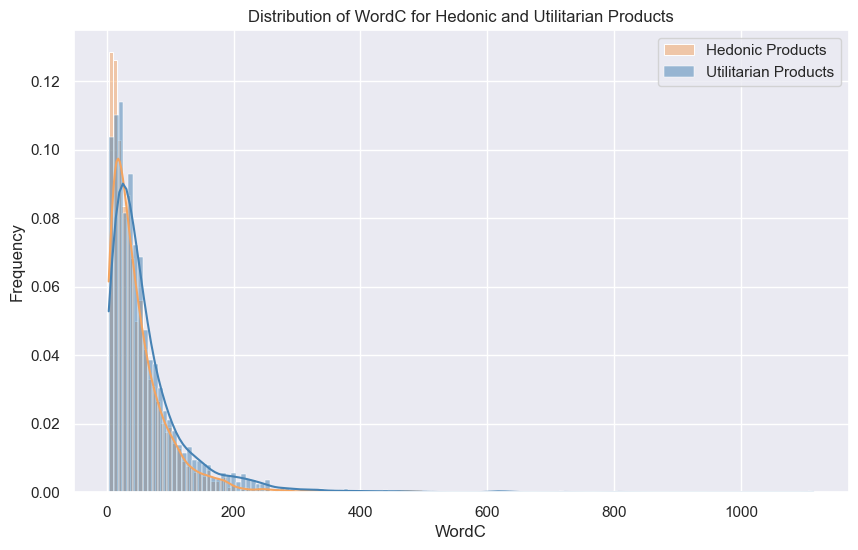

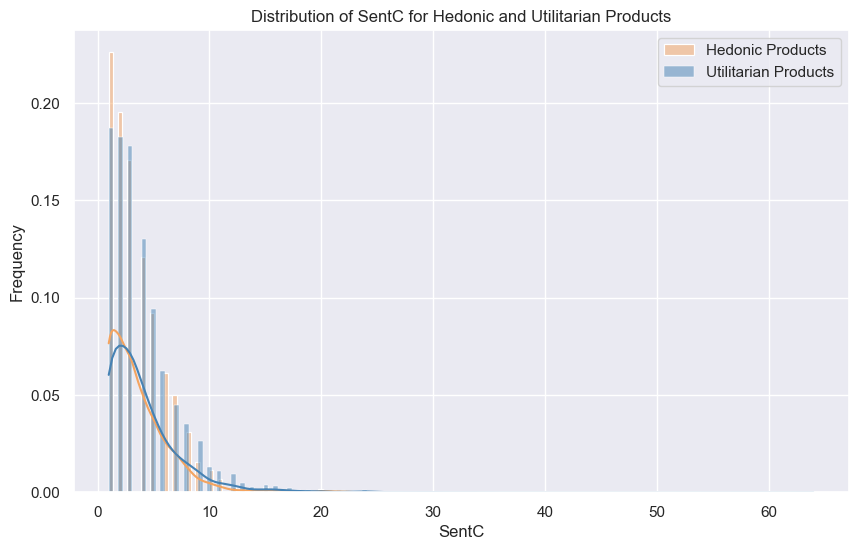

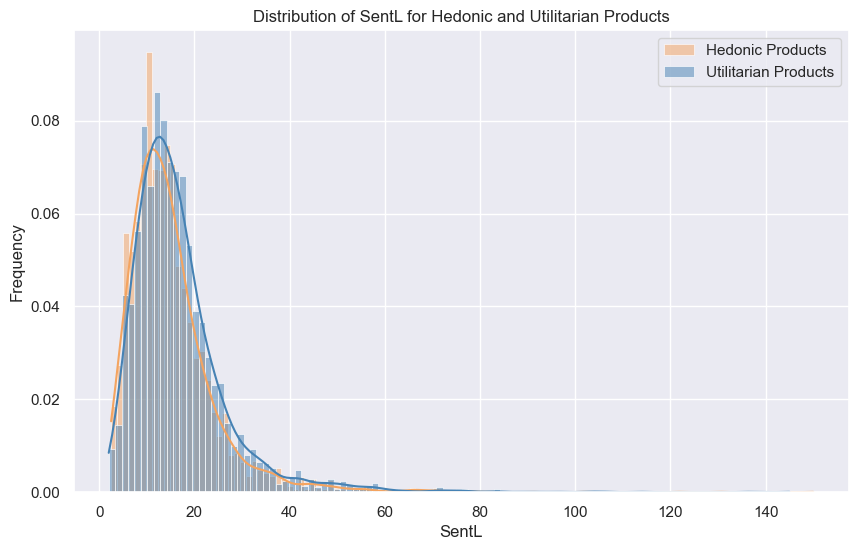

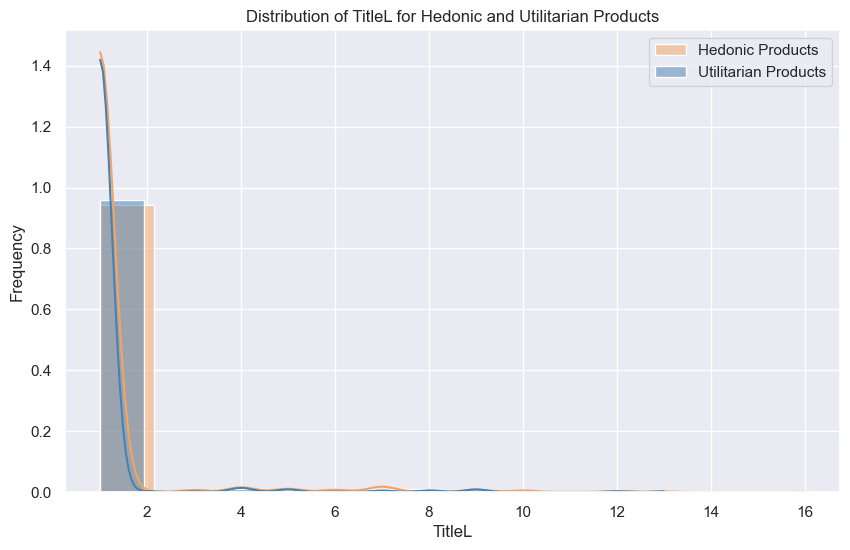

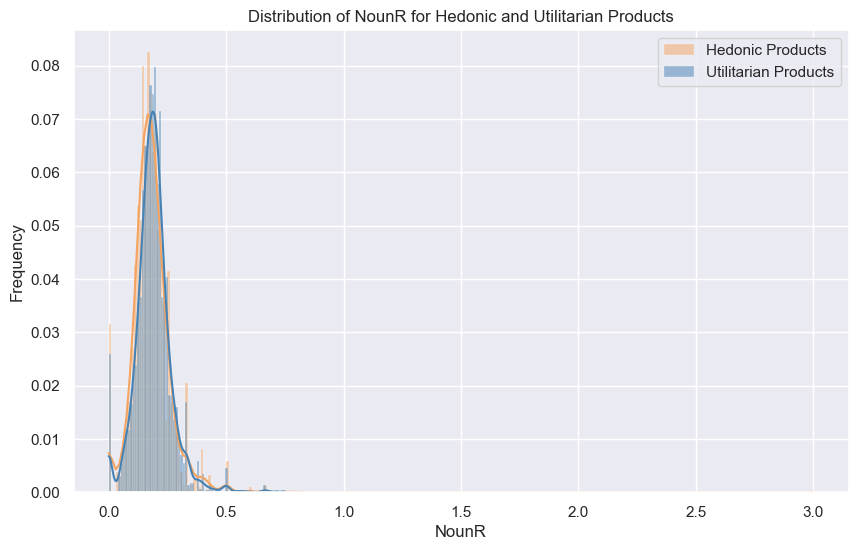

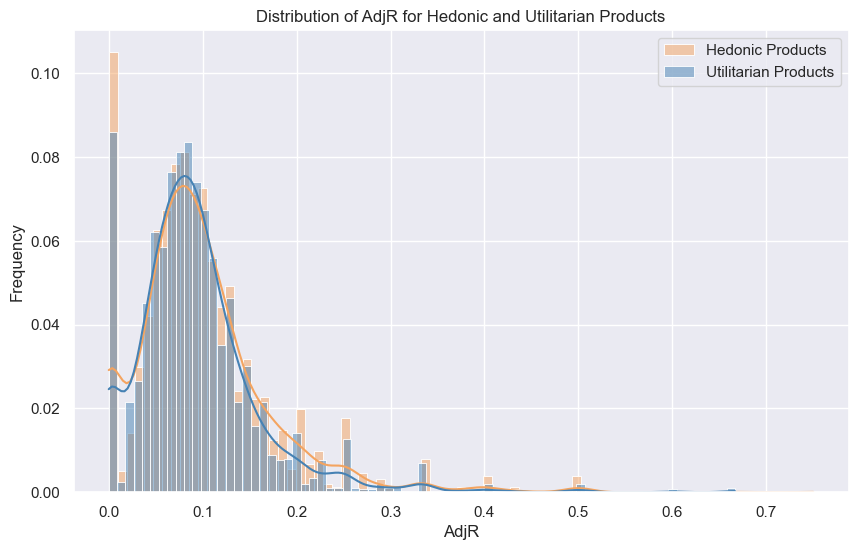

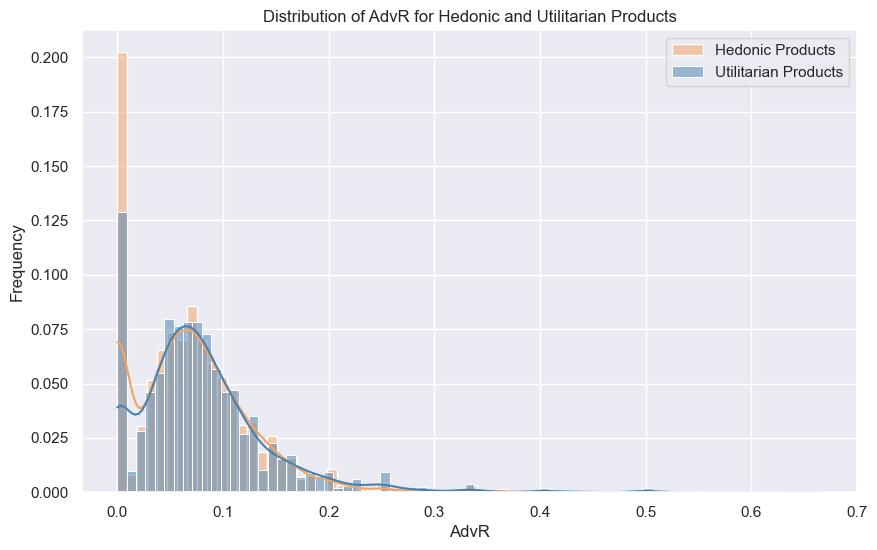

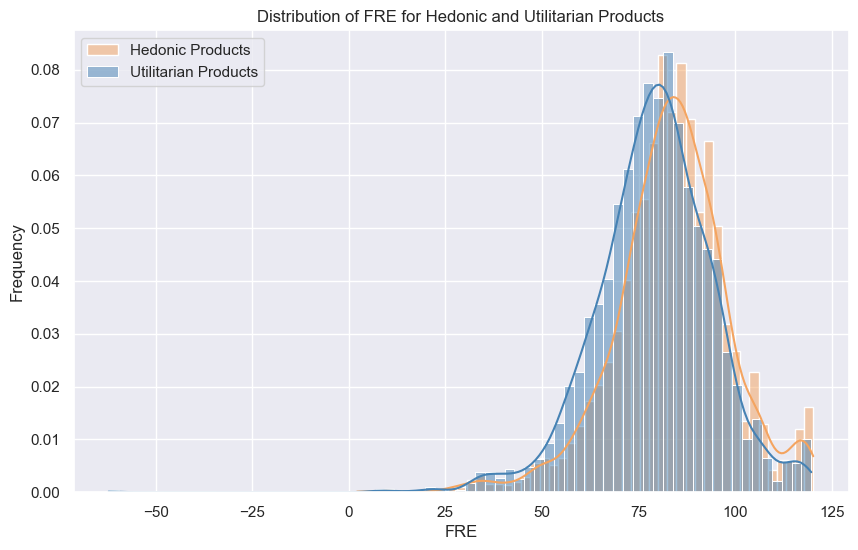

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features =  ['Rating','RewExt','Sentiment_Classification','Subjective', 'ElapDays',
            'WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='sandybrown', kde=True, label='Hedonic Products',stat='probability')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='steelblue', kde=True, label='Utilitarian Products',stat='probability')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


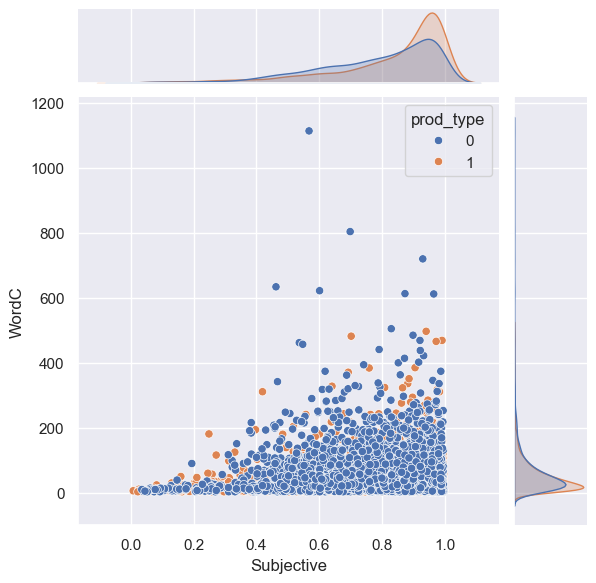

In [32]:
sns.jointplot(data=data_helpful, x="Subjective", y="WordC", hue="prod_type")

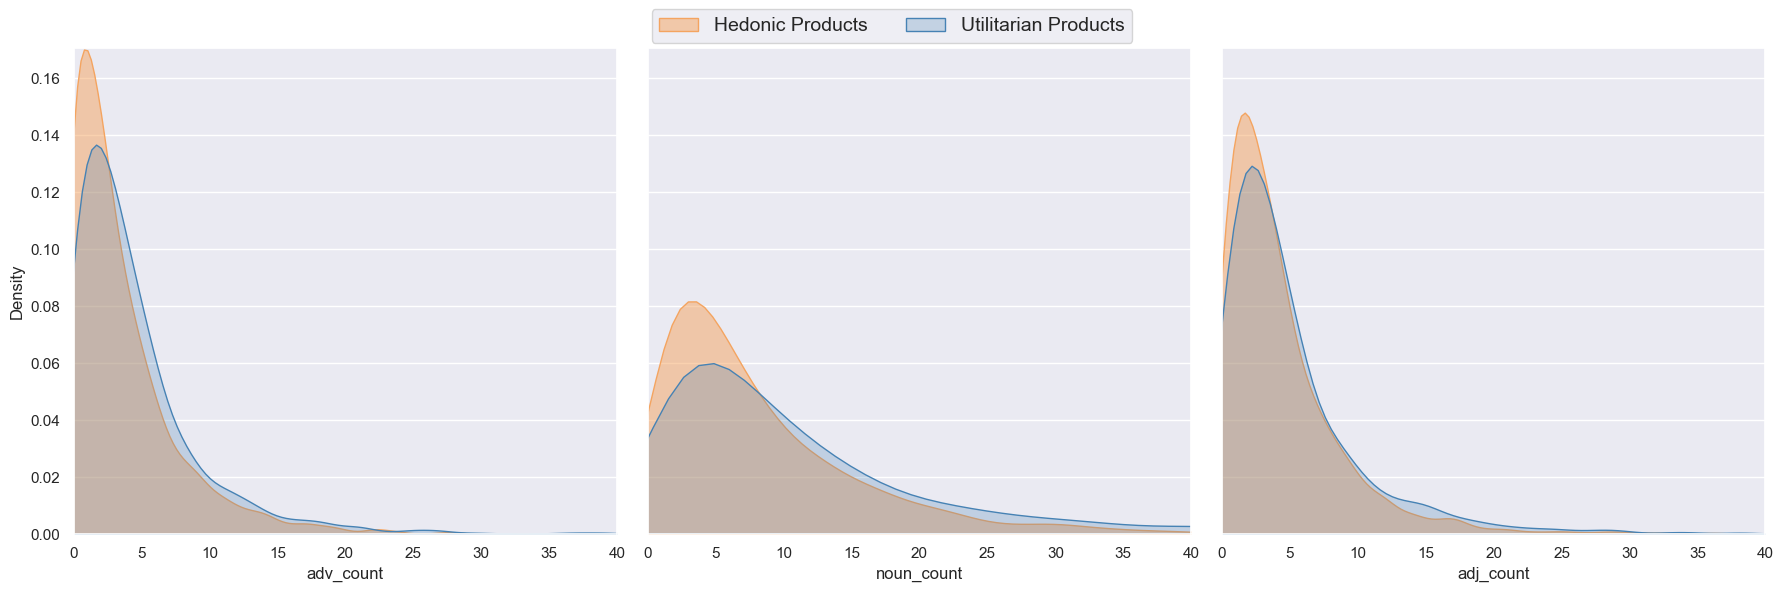

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['adv_count', 'noun_count', 'adj_count']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 40
y_max = 0

# Determine max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot density plots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True, alpha=0.5)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    ax.xaxis.grid(False) 
    
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')  # Remove y-axis label for other plots
        ax.set_yticklabels([])  # Hide y-axis labels for other plots

    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc= 'upper center', ncol=2, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Transform Rating and Sentiment into categorical variables with specific order for Sentiment
data_helpful['Rating'] = data_helpful['Rating'].astype('category')
data_helpful['Sentiment_Classification'] = pd.Categorical(data_helpful['Sentiment_Classification'], categories=['negative', 'neutral', 'positive'], ordered=True)
data_helpful['Product Type'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

# Plot for Rating
rat = sns.histplot(data=data_helpful, x='Rating', hue='Product Type', multiple='dodge', stat='probability',
                    ax=axes[0], alpha=0.9, shrink=0.92,palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'},ec="k",
                    common_norm=False)
axes[0].set_xlabel('Rating', fontsize=16)
axes[0].set_ylabel('Probability', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].yaxis.grid(True)
axes[0].xaxis.grid(False)

# Plot for Sentiment
sent = sns.histplot(data=data_helpful, x='Sentiment_Classification', hue='Product Type', multiple='dodge', discrete=True, stat='probability',
                     ax=axes[1], alpha=0.9, shrink=0.6,palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'},ec="k",
                     common_norm=False)
axes[1].set_xlabel('Sentiment', fontsize=16)
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', labelsize=14)
axes[1].xaxis.grid(False)

# Set the same y-axis limit for both plots
max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
#axes[0].set_ylim(0, 0.39)
#axes[1].set_ylim(0, 0.39)

# Hide y-axis ticks for Sentiment plot
axes[1].set_yticklabels([])

# Adjusting Legend Size
plt.setp(rat.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(rat.get_legend().get_title(), fontsize='14') # for legend title

# Adjusting Legend Size
plt.setp(sent.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(sent.get_legend().get_title(), fontsize='14') # for legend title

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [35]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

                                                 title_x  \
0                                              Love this   
1      The fun games that you remember.. now on the N...   
2                                          So much fun!!   
3                                  Wish this had more...   
4        It is the physical copy and it is a good price.   
...                                                  ...   
18149                                  Really cool mouse   
18150                         the clicks are not durable   
18151                                        Great mouse   
18152                 Double click issues after 3 months   
18153  Cable stopped working only 4 months after purc...   

                                                    text  \
0      My kids have so much fun with this game. Its a...   
1      These are 3 of the classic 3-D Mario games.. t...   
2      I remember being in 5th grade when Mario 64 ca...   
3      I remember the joy of playing th

In [79]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['WordC'])
data['log_sent_length'] = np.log1p(data['SentL'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=1000)

# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=14)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"}, common_norm=False)
axes[0].set_ylabel("log(word_count)", size=15)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot

# Add a big legend inside the right plot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, title='Product Type', title_fontsize='14', fontsize='14', loc='upper right', frameon=True)


# Set the y-axis limit for the first plot
y_max_word_count = data['log_word_count'].max()
axes[0].set_ylim(0, y_max_word_count * 1.25)

# Increase the font size of the x-axis and y-axis labels in the right plot
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=14)

# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"},common_norm=False)
axes[1].set_ylabel("log(sent_length)", size=15)
axes[1].set_xlabel("")


# Set the y-axis limit for the second plot
y_max_sent_length = data['log_sent_length'].max()
axes[1].set_ylim(0, y_max_sent_length * 1.25)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='14', fontsize='14', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


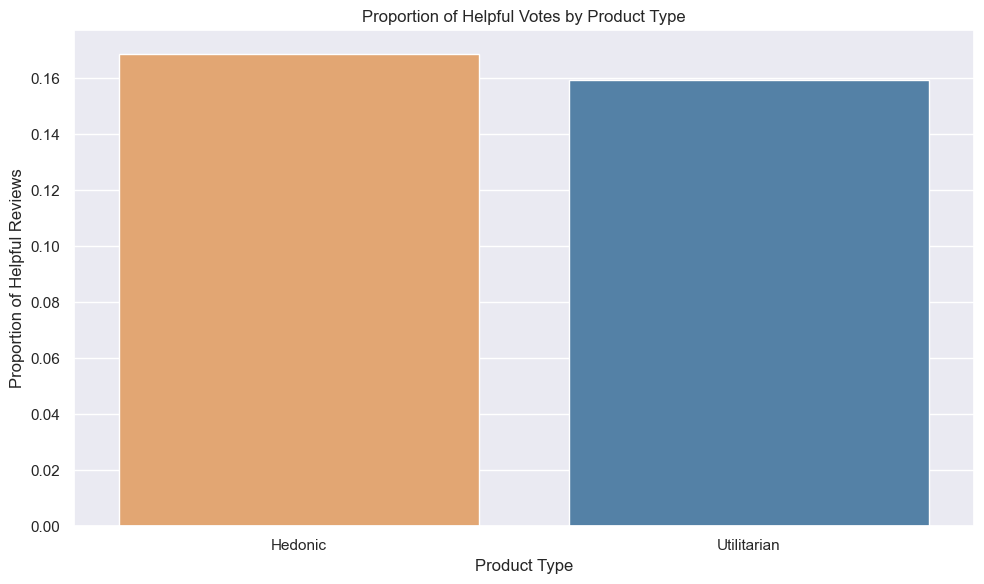

In [37]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

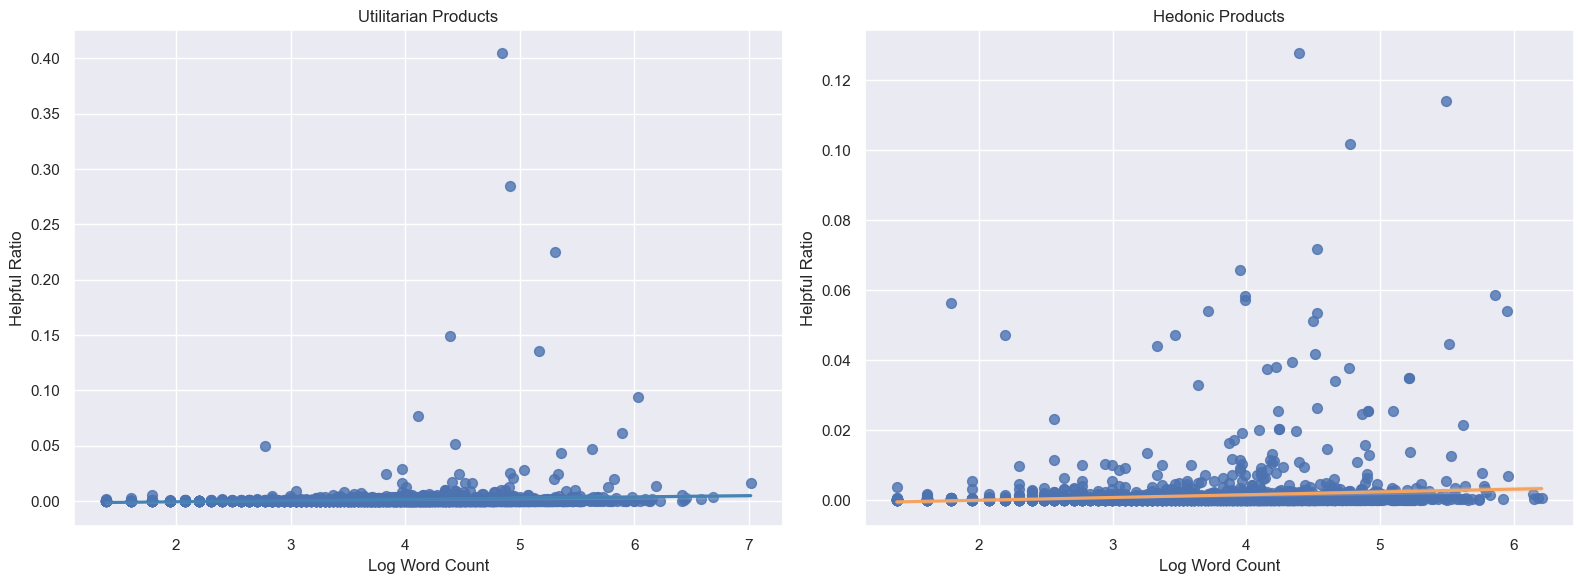

In [38]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['WordC'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

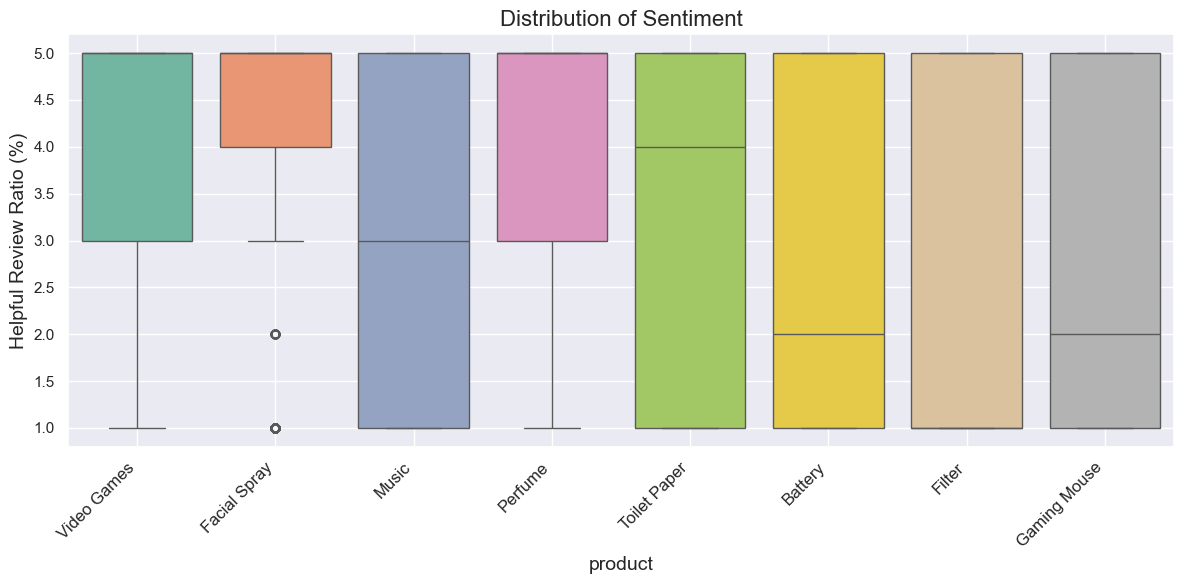

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for hedonic products
plt.figure(figsize=(12, 6))
sns.boxplot(x='Prod', y='Sentiment', data=data_helpful, palette='Set2')
plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('product', fontsize=14)
plt.ylabel('Helpful Review Ratio (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


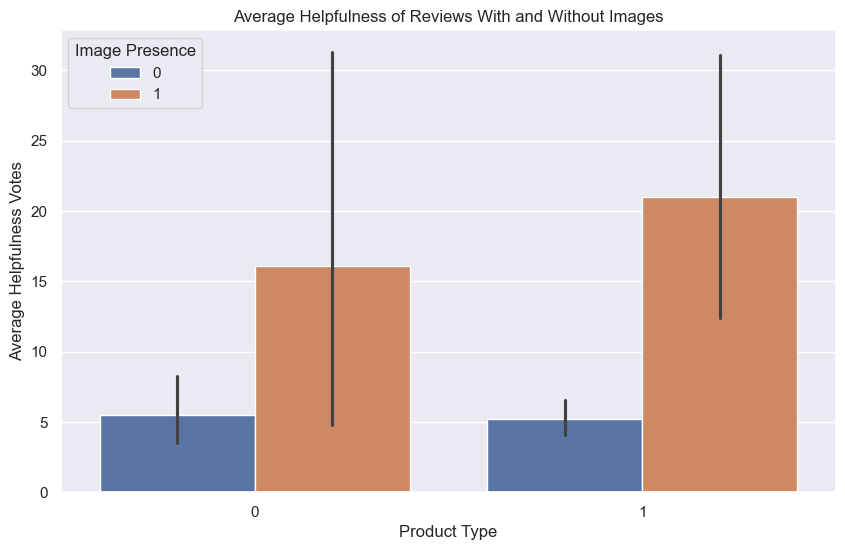

In [40]:
# Calculate average helpfulness for reviews with and without images
avg_helpfulness = data_helpful.groupby(['prod_type', 'Image'])['helpful_vote'].mean

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data_helpful, x='prod_type', y='helpful_vote', hue='Image')
plt.title('Average Helpfulness of Reviews With and Without Images')
plt.xlabel('Product Type')
plt.ylabel('Average Helpfulness Votes')
plt.legend(title='Image Presence')
plt.show()

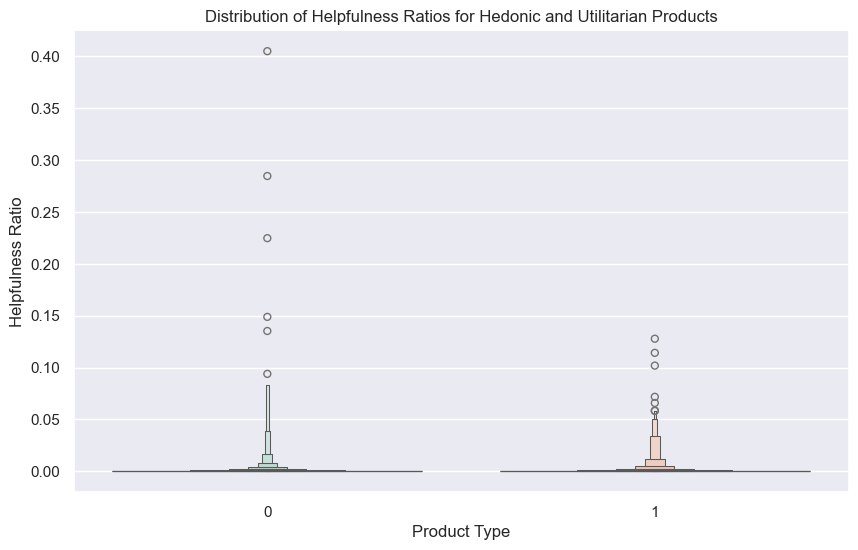

In [41]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data_helpful, x='prod_type', y='helpful_ratio', palette='Set2')
plt.title('Distribution of Helpfulness Ratios for Hedonic and Utilitarian Products')
plt.xlabel('Product Type')
plt.ylabel('Helpfulness Ratio')
plt.show()
